In [1]:
import sys

In [2]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install regex

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from re import search

Preliminary Analysis

Importing the dataset

In [4]:
cwd = os.getcwd()
dataset_dir = os.path.join(cwd,'Dataset')
df = pd.read_csv(os.path.join(dataset_dir,'WELFake_Dataset.csv'))

In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (72134, 4)


In [6]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
unnamed_columns = [col for col in df.columns if search(r'^Unnamed', col)]

df = df.drop(unnamed_columns, axis=1)

df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
print("Dataset shape:", df.shape)

Dataset shape: (72134, 3)


In [9]:
news = 'text'
headline = 'title'

Cleaning the data

Checking for missing data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
df.label.value_counts()

1    37106
0    35028
Name: label, dtype: int64

This confirms that 0 label is used for true news and 1 label is used for fake news

In [12]:
print('Dataset null values:\n',df.isna().sum())

Dataset null values:
 title    558
text      39
label      0
dtype: int64


In [13]:
def show_tf_distribution(df, column) :
    null = df[df[column].isna()]
    total = len(null)
    notfake_cnt = list(null[null['label']==0].shape)[0]
    fake_cnt = list(null[null['label']==1].shape)[0]
    
    print('Null Values distribution for \''+column+'\' on basis for realness')
    print('Total:\t',total)
    print('Real %:\t',format(((notfake_cnt/total)*100),'.2f'))
    print('Fake %:\t',format(((fake_cnt/total)*100),'.2f'))

In [14]:
show_tf_distribution(df, news)

Null Values distribution for 'text' on basis for realness
Total:	 39
Real %:	 0.00
Fake %:	 100.00


In [15]:
show_tf_distribution(df, headline)

Null Values distribution for 'title' on basis for realness
Total:	 558
Real %:	 0.00
Fake %:	 100.00


As every instance of missing value almost always indicates a fake news article, missing value/information can be an identifying factor. Hence not dropping rows with null values.

Checking for placeholder values and duplicates

In [16]:
headline_value_counts = df[headline].value_counts()
headline_value_counts[headline_value_counts > 1]

Factbox: Trump fills top jobs for his administration                                                                                  14
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                                     8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                                       8
Factbox: Contenders for senior jobs in Trump's administration                                                                          8
Michael Moore Owes Me $4.99                                                                                                            7
                                                                                                                                      ..
TWO SOMALI MUSLIM MEN Arrested For Daytime Gun Fight In Olive Garden Parking Lot In City Ranked “#2 Best Place To Live In America”     2
WILL OBAMA REGIME Be Held Accountable For

In [17]:
duplicate_headline_list = set(headline_value_counts[headline_value_counts > 1].keys())
df_dup_headline = df[df[headline].isin(duplicate_headline_list)]
df_dup_headline

,title,text,label
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
13,WATCH: HILARIOUS AD Calls Into Question Health...,"After watching this telling video, you ll wond...",1
...,...,...,...
72116,SAY “HELLO” TO YOUR NEW NEIGHBORS! Clooney Beg...,Karma it s a beautiful thing A massive makeshi...,1
72118,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,1
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1


In [18]:
df_dup_headline[df_dup_headline.duplicated()]

,title,text,label
873,Just Weeks After Obama’s Executive Order on Ca...,By Melissa Dykes This has already been the cra...,1
1192,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
1508,HILARIOUS! LIBERALS STUNNED When Republican Gu...,"On Saturday, MSNBC s Joy Reid repeatedly attem...",1
1632,Strange: Trump ‘Internet Takeover’ Fear Story ...,21st Century Wire says A red flag went up when...,1
1661,WOW! HILLARY Took State Department Furniture T...,Most of the documents are testimonies provided...,1
...,...,...,...
72116,SAY “HELLO” TO YOUR NEW NEIGHBORS! Clooney Beg...,Karma it s a beautiful thing A massive makeshi...,1
72118,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,1
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1


There are 8416 duplicated rows that needs to be deleted

In [19]:
df_dup_headline[df_dup_headline.duplicated([news])]

,title,text,label
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1
325,Ohio State University Student Says Terrorist A...,,1
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1
514,HILARIOUS TRUMP CHRISTMAS VIDEO: “It’s The Mos...,,1
...,...,...,...
72116,SAY “HELLO” TO YOUR NEW NEIGHBORS! Clooney Beg...,Karma it s a beautiful thing A massive makeshi...,1
72118,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,1
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1


There are 8658 rows with duplicated text

In [20]:
df_dup_headline[df_dup_headline.duplicated([headline, news])]

,title,text,label
873,Just Weeks After Obama’s Executive Order on Ca...,By Melissa Dykes This has already been the cra...,1
1192,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
1508,HILARIOUS! LIBERALS STUNNED When Republican Gu...,"On Saturday, MSNBC s Joy Reid repeatedly attem...",1
1632,Strange: Trump ‘Internet Takeover’ Fear Story ...,21st Century Wire says A red flag went up when...,1
1661,WOW! HILLARY Took State Department Furniture T...,Most of the documents are testimonies provided...,1
...,...,...,...
72116,SAY “HELLO” TO YOUR NEW NEIGHBORS! Clooney Beg...,Karma it s a beautiful thing A massive makeshi...,1
72118,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,1
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1


There are 8416 rows with both headlines and news duplicated. These needs to be removed.

In [21]:
df_dup_headline[df_dup_headline[news] == ' ']

,title,text,label
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1
325,Ohio State University Student Says Terrorist A...,,1
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1
...,...,...,...
71235,World War 3?,,1
71621,WATCH LIBERAL CNN LAWYER Skewer “Village Idiot...,,1
71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1


We can leave duplicate headlines as that is a common part of news when it undergoes revision but those instances where both headline and news articles are same needs to be dropped. Rows without news will also be removed.

Checking news for whitespaces.

In [22]:
df[df[news] == ' ']

,title,text,label
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1
325,Ohio State University Student Says Terrorist A...,,1
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1
...,...,...,...
71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1


Replacing white spaces with null.

In [23]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [24]:
df.isna().sum()

title    558
text     783
label      0
dtype: int64

This shows that there is increase in null values in column news as we replace articles that only had null values.

In [25]:
show_tf_distribution(df, news)

Null Values distribution for 'text' on basis for realness
Total:	 783
Real %:	 0.13
Fake %:	 99.87


The distribution shows that all null news values still point to fake news. As these values are small compared to total dataset size, dropping them might be preferable.

Removing Duplicated Data

In [26]:
len(df)

72134

Dropping rows with no news article or headlines

In [27]:
df_clean = df.dropna(subset=[headline,news])

In [28]:
len(df_clean)

70793

Dropping rows with same headline and news articles

In [29]:
df_clean = df_clean.drop_duplicates([headline, news], ignore_index=True)

In [30]:
len(df_clean)

62592

Dropping rows with same news articles

In [31]:
df_clean = df_clean.drop_duplicates([news], ignore_index=True)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62197 entries, 0 to 62196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   62197 non-null  object
 1   text    62197 non-null  object
 2   label   62197 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [33]:
df_clean.isna().sum()

title    0
text     0
label    0
dtype: int64

In [34]:
len(df) - len(df_clean)

9937

In [35]:
df_clean.label.value_counts()

0    34620
1    27577
Name: label, dtype: int64

Summary

9937 rows of data removed on basis of not having information in news column, headline column and or having duplicate values.

Exploring the dataset

Helper Function

In [36]:
graph_dir = os.path.join(cwd,'Graphs')

In [37]:
def show_hist_for_col(df, column, title):
    """
    Display a histogram for a column in a dataframe, splitting the data by label.
    """
    plt.figure(figsize=(12,8))
    df[df.label == 0][column].hist(label='True')
    df[df.label == 1][column].hist(alpha=0.4, label='Fake')
    plt.title(title)
    plt.legend()
    plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
    plt.show()
    plt.close()

Distribution of Labels

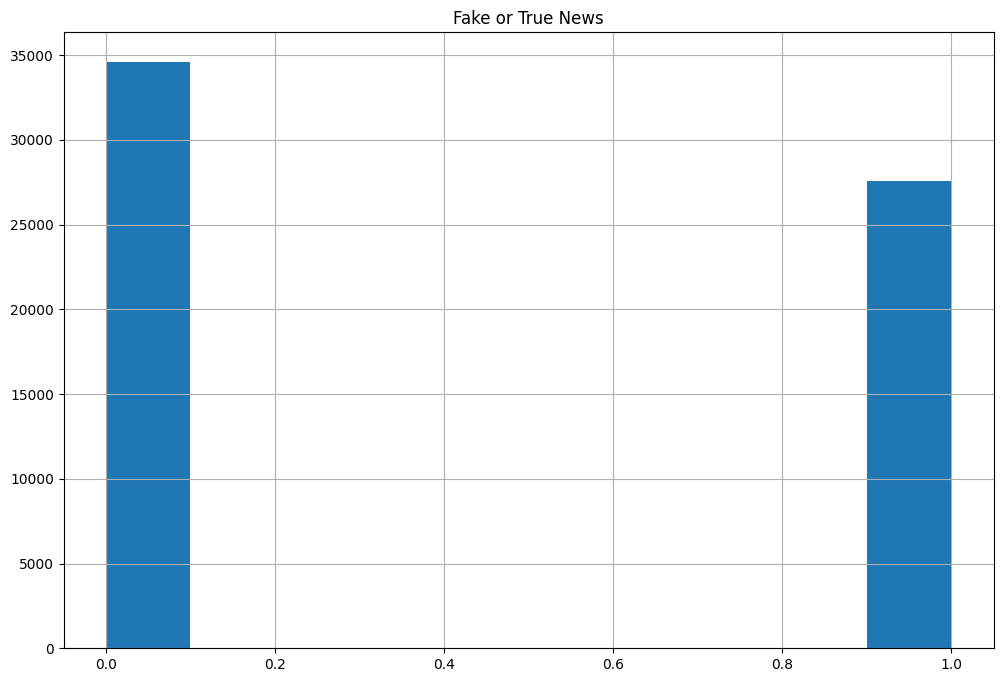

In [38]:
plt.figure(figsize=(12,8))
df_clean.label.hist()
title = 'Fake or True News'
plt.title(title)
plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
plt.show()
plt.close()

After cleaning the data there is an imbalance present but hopefully not enough to have effect on the models

Length of Headlines

In [39]:
df_clean['headline_len'] = df_clean[headline].str.len()

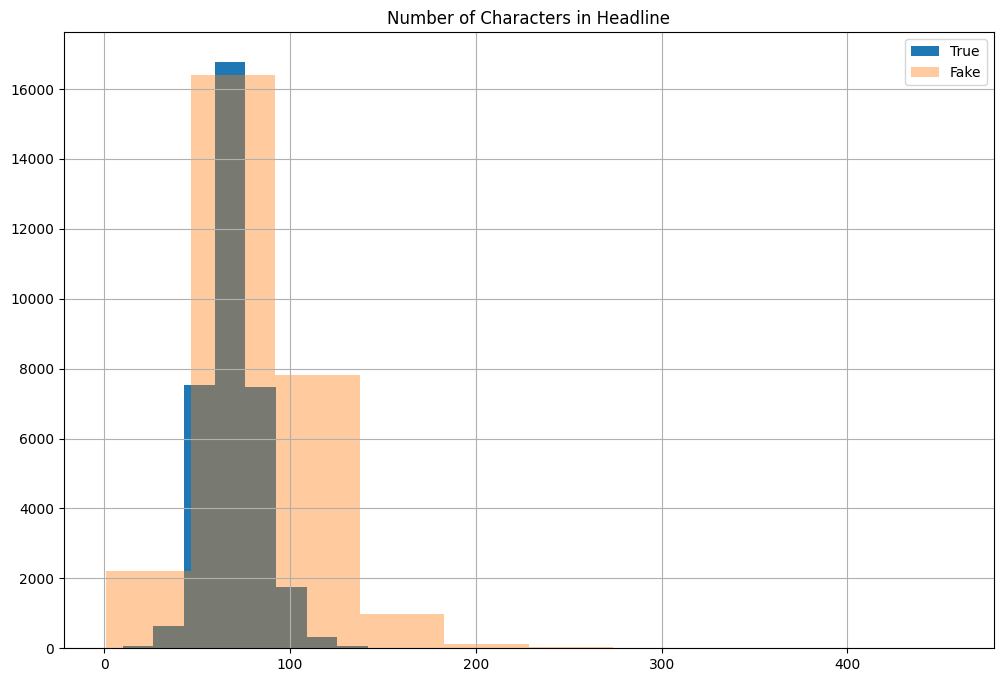

In [40]:
show_hist_for_col(df_clean, 'headline_len', 'Number of Characters in Headline')

In [41]:
df_clean[df_clean.label == 0].headline_len.describe()

count    34620.000000
mean        68.953784
std         14.276896
min         10.000000
25%         60.000000
50%         67.000000
75%         77.000000
max        175.000000
Name: headline_len, dtype: float64

In [42]:
df_clean[df_clean.label == 1].headline_len.describe()

count    27577.000000
mean        82.925445
std         27.988284
min          1.000000
25%         67.000000
50%         82.000000
75%         96.000000
max        456.000000
Name: headline_len, dtype: float64

Fake news stories have a wider range in the length of title than True news stories. The quartile differences between fake news articles is much larger than in case of true news article.

Length of News article

In [43]:
df_clean['news_len'] = df_clean[news].str.len()

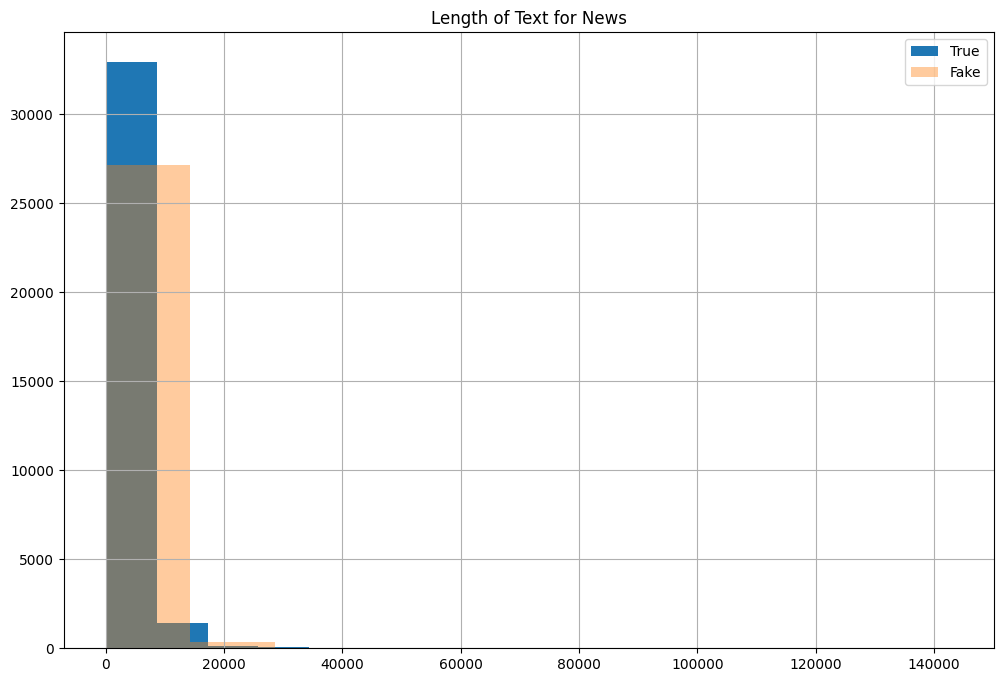

In [44]:
show_hist_for_col(df_clean, 'news_len', 'Length of Text for News')

In [45]:
df_clean[df_clean.label == 0].news_len.describe()

count    34620.000000
mean      3515.170017
std       3332.709995
min          3.000000
25%       1499.000000
50%       2654.000000
75%       4776.000000
max      85948.000000
Name: news_len, dtype: float64

In [46]:
df_clean[df_clean.label == 1].news_len.describe()

count     27577.000000
mean       3123.718606
std        3973.746074
min           5.000000
25%        1518.000000
50%        2298.000000
75%        3426.000000
max      142961.000000
Name: news_len, dtype: float64

In [47]:
df_long = df_clean[df_clean.news_len > 10000]

In [48]:
df_long

,title,text,label,headline_len,news_len
21,UNHOLY ALLIANCE: Hillary Clinton’s Saudi Spons...,21st Century Wire says Amid the tossing and t...,1,87,15512
43,Mayday on the Carolina Queen - The New York Times,The seven fishermen aboard the Carolina Queen ...,0,49,16320
78,UNsilenced: Whistleblower Exposes UN Culture o...,Email \nWhen she stumbled across massive corru...,1,58,13553
110,CNN: One voter can make a difference by voting...,Channel list \nFollowing hurricane Matthew's f...,1,57,26772
117,Trump advisors try to pivot not fishtail,**Want FOX News First in your inbox every day?...,0,40,10973
...,...,...,...,...,...
62058,Strange People Who Shifted to Other Dimensions,Mysterious Universe \nDo other realities brush...,1,46,17385
62081,Liberalism Yet To Come: The Boundaries of the ...,by Outis Philalithopoulos In yesterday’s episo...,1,55,13908
62154,The “American Conservative Movement” Has Ended...,Here's something interesting from The Unz Revi...,1,75,14145
62178,Physician Aid in Dying Gains Acceptance in the...,Judith Katherine Dunning had been waiting anxi...,0,72,10128


In [49]:
df_long.label.value_counts()

1    929
0    924
Name: label, dtype: int64

ok there does not seem to be bias in long stories towards either type of articles so they will be kept. also fake news article have shown much higher max story size and significantly lower quartile scores across the board.

Capital letters in headline.

In [50]:
df_clean['caps_in_headline'] = df_clean[headline].apply(lambda headline: sum(1 for char in headline if char.isupper()))

In [51]:
df_clean

,title,text,label,headline_len,news_len,caps_in_headline
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049,46
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,137,216,91
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010,4
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916,16
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,78,1530,13
...,...,...,...,...,...,...
62192,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,104,1237,50
62193,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,65,4788,6
62194,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,79,3634,14
62195,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,57,2864,10


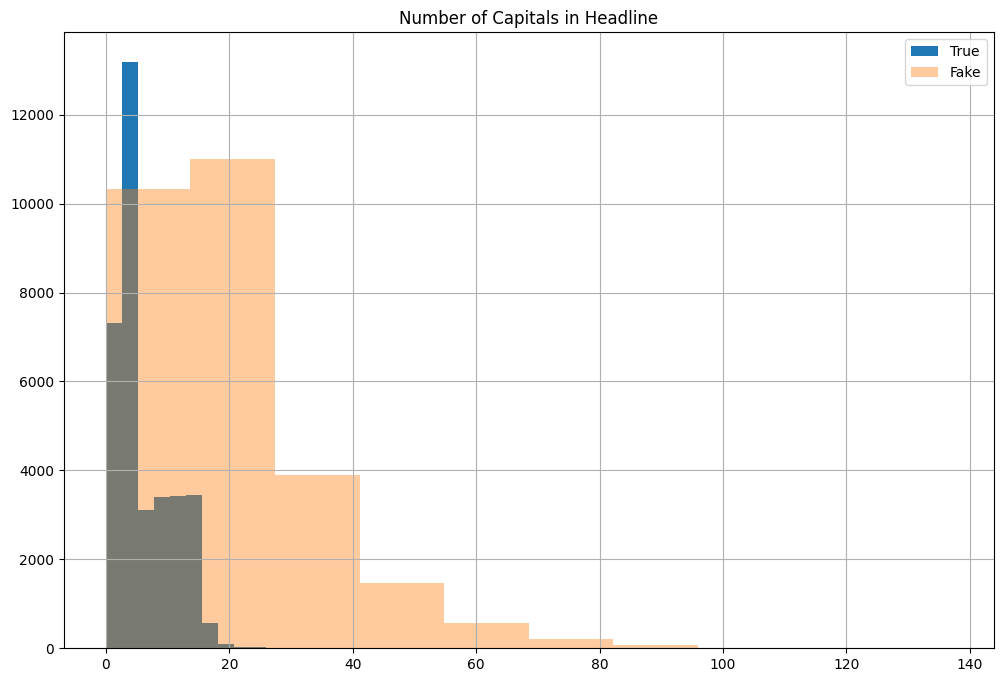

In [52]:
show_hist_for_col(df_clean, 'caps_in_headline', 'Number of Capitals in Headline')

In [53]:
df_clean[df_clean.label == 0].caps_in_headline.describe()

count    34620.000000
mean         6.141450
std          4.352059
min          0.000000
25%          3.000000
50%          4.000000
75%         10.000000
max         26.000000
Name: caps_in_headline, dtype: float64

In [54]:
df_clean[df_clean.label == 1].caps_in_headline.describe()

count    27577.000000
mean        20.040976
std         14.459473
min          0.000000
25%         10.000000
50%         17.000000
75%         26.000000
max        137.000000
Name: caps_in_headline, dtype: float64

There is much more deviation in number of Capital letter in headline in fake news articles. also fake news articles have much more amount of Capital letter in headline.

In [55]:
df_clean['norm_caps_in_headline'] = df_clean['caps_in_headline'] / df_clean['headline_len']

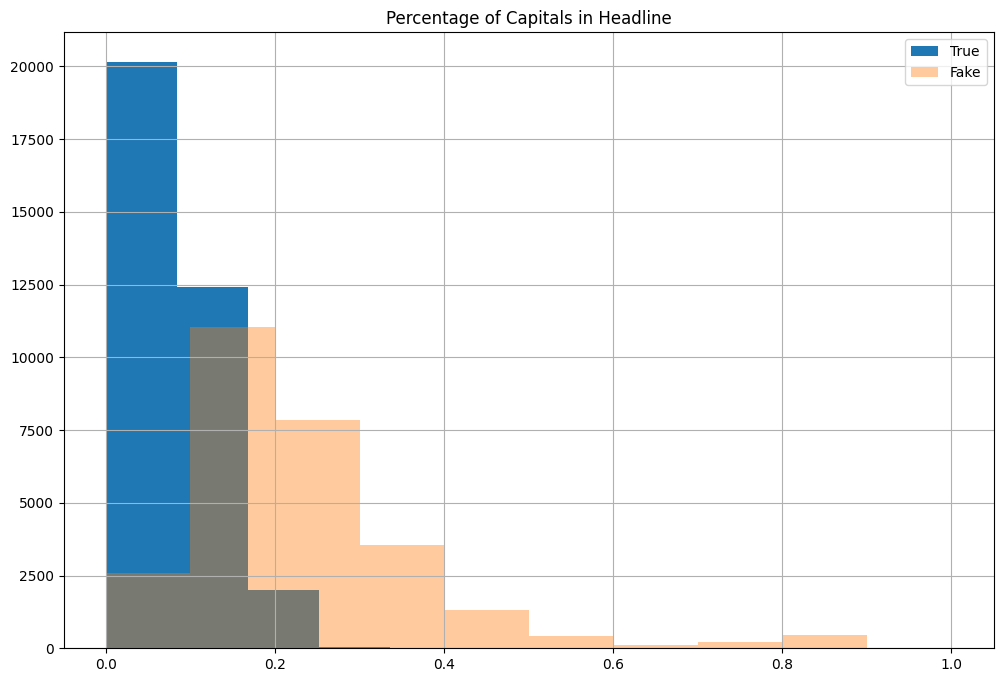

In [56]:
show_hist_for_col(df_clean, 'norm_caps_in_headline', 'Percentage of Capitals in Headline')

In [57]:
df_clean[df_clean.label == 0].norm_caps_in_headline.describe()

count    34620.000000
mean         0.085809
std          0.051933
min          0.000000
25%          0.043478
50%          0.068966
75%          0.134615
max          0.838710
Name: norm_caps_in_headline, dtype: float64

In [58]:
df_clean[df_clean.label == 1].norm_caps_in_headline.describe()

count    27577.000000
mean         0.232570
std          0.142015
min          0.000000
25%          0.147368
50%          0.200000
75%          0.285714
max          1.000000
Name: norm_caps_in_headline, dtype: float64

percentage of capitals may be useful as even first quartile of percentage of capitals in fake news is larger than even third quartile in true news article. but this might not be generalizable

Capital in news article

In [59]:
df_clean['caps_in_news'] = df_clean[news].apply(lambda news: sum(1 for char in news if char.isupper()))

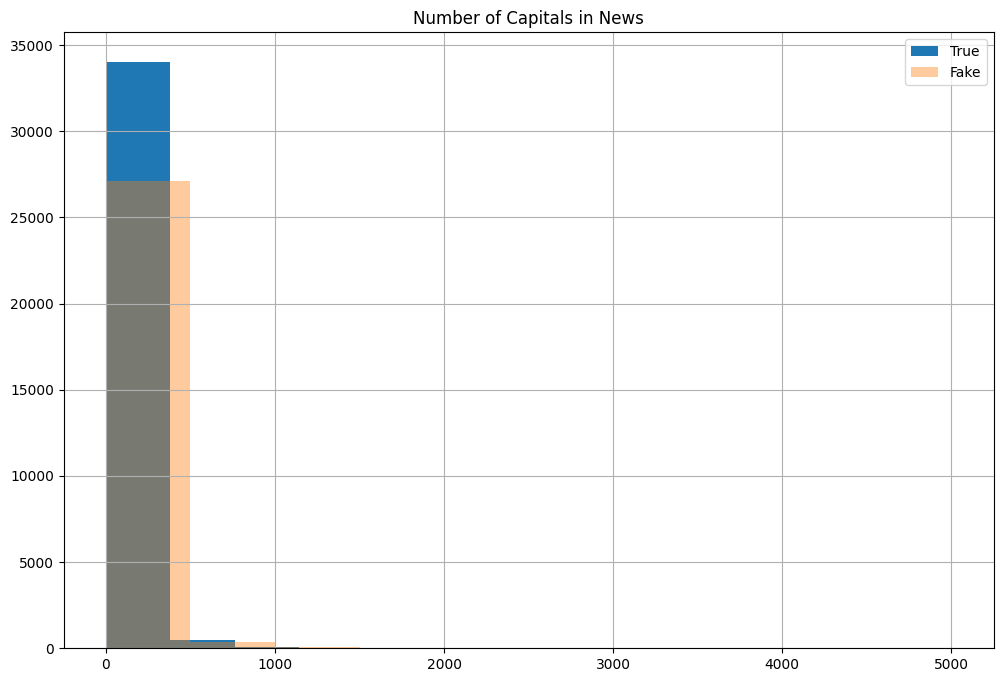

In [60]:
show_hist_for_col(df_clean, 'caps_in_news', 'Number of Capitals in News')

In [61]:
df_clean[df_clean.label == 0].caps_in_news.describe()

count    34620.000000
mean       116.356961
std        104.906172
min          0.000000
25%         53.000000
50%         92.000000
75%        152.000000
max       3809.000000
Name: caps_in_news, dtype: float64

In [62]:
df_clean[df_clean.label == 1].caps_in_news.describe()

count    27577.000000
mean       117.448671
std        149.309811
min          0.000000
25%         55.000000
50%         84.000000
75%        133.000000
max       5000.000000
Name: caps_in_news, dtype: float64

In [63]:
df_clean['norm_caps_in_news'] = df_clean['caps_in_news'] / df_clean['news_len']

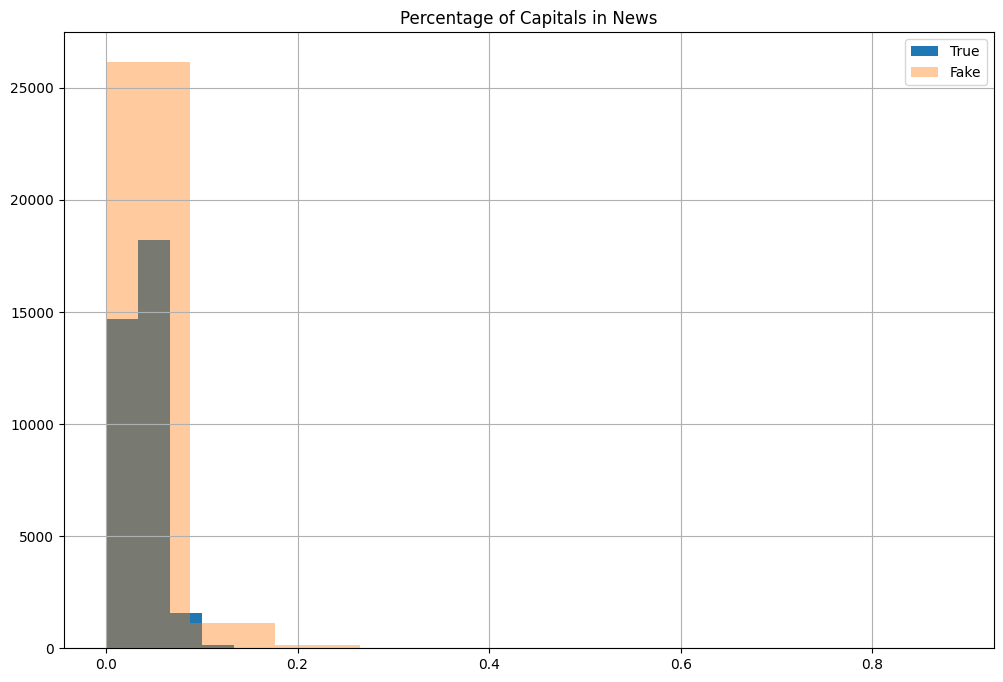

In [64]:
show_hist_for_col(df_clean, 'norm_caps_in_news', 'Percentage of Capitals in News')

In [65]:
df_clean[df_clean.label == 0].norm_caps_in_news.describe()

count    34620.000000
mean         0.038249
std          0.014575
min          0.000000
25%          0.028935
50%          0.035200
75%          0.043562
max          0.333333
Name: norm_caps_in_news, dtype: float64

In [66]:
df_clean[df_clean.label == 1].norm_caps_in_news.describe()

count    27577.000000
mean         0.044475
std          0.042446
min          0.000000
25%          0.028915
50%          0.036147
75%          0.047354
max          0.882353
Name: norm_caps_in_news, dtype: float64

There is a lot of overlap in number of capitals in news article between fake and real news.

In [67]:
def check_string_for(substring, fullstring):
    """Check if the substring is in the fullstring"""
    if search(substring, fullstring):
        return True
    else:
        return False

Via and Image Via in article

In [68]:
df_via = df_clean[df_clean[news].apply(lambda news_text: check_string_for(' via', news_text))]

In [69]:
df_via

,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
8,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,80,4679,16,0.200000,262,0.055995
20,"Sean Spicer Baffles Reporters, Claims Trump I...","On Tuesday, White House Propaganda Minister Se...",1,87,2123,16,0.183908,84,0.039567
21,UNHOLY ALLIANCE: Hillary Clinton’s Saudi Spons...,21st Century Wire says Amid the tossing and t...,1,87,15512,22,0.252874,652,0.042032
22,Even Trump’s Best Friend Joe Scarborough Can’...,"Recently, Joe Scarborough has found himself th...",1,94,2285,19,0.202128,93,0.040700
36,Emboldened NRA Threatens New York Times: ‘We’...,"The NRA has a new favorite toy, but there are ...",1,72,2935,17,0.236111,126,0.042930
...,...,...,...,...,...,...,...,...,...
62161,"Lesbian Couple Beaten, Arrested For Holding H...","In October of 2015, California couple Courtney...",1,82,2078,14,0.170732,74,0.035611
62163,Ft. Lauderdale Terrorist Says He Carried Out A...,Esteban Santiago Ruiz told the FBI that he car...,0,69,3261,10,0.144928,131,0.040172
62184,"Racist Prick Spits On Black Pair, Yells N****...","Are we a post-racial nation? No, we re not, no...",1,95,2858,14,0.147368,49,0.017145
62187,Florida Judge Blames Rape Victim For Attendin...,The Ultra Music Festival in Miami is one of th...,1,62,2446,9,0.145161,59,0.024121


In [70]:
df_via['label'].value_counts()

1    8533
0    1261
Name: label, dtype: int64

Via is much more indicative of fake news article compared to true news article.

In [71]:
df_image_via = df_clean[df_clean[news].apply(lambda news_text: check_string_for('image via', news_text))]

In [72]:
df_image_via

,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
20,"Sean Spicer Baffles Reporters, Claims Trump I...","On Tuesday, White House Propaganda Minister Se...",1,87,2123,16,0.183908,84,0.039567
22,Even Trump’s Best Friend Joe Scarborough Can’...,"Recently, Joe Scarborough has found himself th...",1,94,2285,19,0.202128,93,0.040700
36,Emboldened NRA Threatens New York Times: ‘We’...,"The NRA has a new favorite toy, but there are ...",1,72,2935,17,0.236111,126,0.042930
37,Noam Chomsky GOES OFF On Donald Trump: ‘He’s ...,It s no secret that world-renowned political t...,1,63,2076,24,0.380952,65,0.031310
60,Elijah Cummings Made Sure The GOP Is Well Awa...,There seems to be a definite double standard w...,1,94,3085,16,0.170213,98,0.031767
...,...,...,...,...,...,...,...,...,...
62148,Republicans Hilariously Go Ballistic Because ...,"Let the mocking commence.On Wednesday evening,...",1,105,3664,16,0.152381,286,0.078057
62150,Watch What Happens When A Rapist Pedophile Tr...,Our street corners are filled with people in n...,1,99,1867,24,0.242424,43,0.023032
62161,"Lesbian Couple Beaten, Arrested For Holding H...","In October of 2015, California couple Courtney...",1,82,2078,14,0.170732,74,0.035611
62184,"Racist Prick Spits On Black Pair, Yells N****...","Are we a post-racial nation? No, we re not, no...",1,95,2858,14,0.147368,49,0.017145


In [73]:
df_image_via['label'].value_counts()

1    6158
Name: label, dtype: int64

With all the posts with image via being Fake, it's highly indicative of that label, but this may be particular to this dataset and may not generalize.

Said in news article

In [74]:
df_said = df_clean[df_clean[news].apply(lambda news_text: check_string_for('said', news_text))]

In [75]:
df_said

,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049,46,0.353846,161,0.031888
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010,4,0.038095,246,0.030712
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916,16,0.168421,123,0.064196
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,78,1530,13,0.166667,97,0.063399
6,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,116,1439,17,0.146552,67,0.046560
...,...,...,...,...,...,...,...,...,...
62192,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,104,1237,50,0.480769,51,0.041229
62193,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,65,4788,6,0.092308,182,0.038012
62194,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,79,3634,14,0.177215,120,0.033021
62195,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,57,2864,10,0.175439,105,0.036662


In [76]:
df_said['label'].value_counts()

0    30923
1    14261
Name: label, dtype: int64

The stories containing the word said are indicative of the news story being true. With twice as many of the "true" news stories containing said vs. "fake", the true ones must seem likely to be more concerned with providing quotations, or at least quotations in this style.

On in news article

In [77]:
df_on = df_clean[df_clean[news].apply(lambda news_text: check_string_for(' on ', news_text))]

In [78]:
df_on

,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049,46,0.353846,161,0.031888
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010,4,0.038095,246,0.030712
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,95,1916,16,0.168421,123,0.064196
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,78,1530,13,0.166667,97,0.063399
6,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,116,1439,17,0.146552,67,0.046560
...,...,...,...,...,...,...,...,...,...
62192,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,104,1237,50,0.480769,51,0.041229
62193,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,65,4788,6,0.092308,182,0.038012
62194,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,79,3634,14,0.177215,120,0.033021
62195,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,57,2864,10,0.175439,105,0.036662


In [79]:
df_on.label.value_counts()

0    34031
1    23341
Name: label, dtype: int64

The use of 'on' is fairly balanced although somewhat indicative of a 'true' story.

You in news article

In [80]:
df_you = df_clean[df_clean[news].apply(lambda news_text: check_string_for(' you ', news_text))]

In [81]:
df_you

,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049,46,0.353846,161,0.031888
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,105,8010,4,0.038095,246,0.030712
6,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1,116,1439,17,0.146552,67,0.046560
8,GOP Senator Just Smacked Down The Most Puncha...,The most punchable Alt-Right Nazi on the inter...,1,80,4679,16,0.200000,262,0.055995
11,WATCH: HILARIOUS AD Calls Into Question Health...,"After watching this telling video, you ll wond...",1,83,209,26,0.313253,5,0.023923
...,...,...,...,...,...,...,...,...,...
62182,Police Are Now Warning People To Take A Photo ...,November 2015 Ads Police Are Now Warning Peopl...,1,101,3010,20,0.198020,65,0.021595
62189,"Dallas, Roger Federer, Hillary Clinton: Your F...",(Want to get this briefing by email? Here’s th...,0,89,4201,13,0.146067,150,0.035706
62191,Determined to kill: Can tough gun laws end mas...,The flag at Desert Hot Springs' Condor Gun Sho...,0,58,13017,2,0.034483,358,0.027502
62192,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,104,1237,50,0.480769,51,0.041229


In [82]:
df_you.label.value_counts()

1    12981
0     8681
Name: label, dtype: int64

You is present in both true and fake news stories with a bit more mention in fake news stories which might be due to a more informal writing approach.

Save the Cleaned Dataset

In [83]:
df_clean.to_csv(os.path.join(dataset_dir,'train_news_cleaned.csv'),index=False)